# Commands in mySQL for Group By Aggregates
- Links
    - https://www.w3schools.com/mysql/mysql_groupby.asp
    - https://www.geeksforgeeks.org/mysql/mysql-group-by-clause
    - https://dev.mysql.com/doc/refman/8.4/en/group-by-modifiers.html
    - https://blog.devart.com/mysql-group-by-tutorial.html
- Sample Tables
    - https://dev.mysql.com/doc/sakila/en/sakila-structure-tables.html
- DOP : 6 Dec 2025

# Steps
- Make sure you have installed Mysql
- Check if MySQL is running
- Goto folder of MySQL in Win
    - cd c:/program files/mysql/mysqlserver 8.0/bin
- mysql -u piuser -p  (or root user / pwd) : Pass@123
- if you get mysql> prompt that means your login is successful
- mysql commands
    - show databases;
    - use piit;
    - show tables;
    - select * from employees;
    - select * from mtcars;

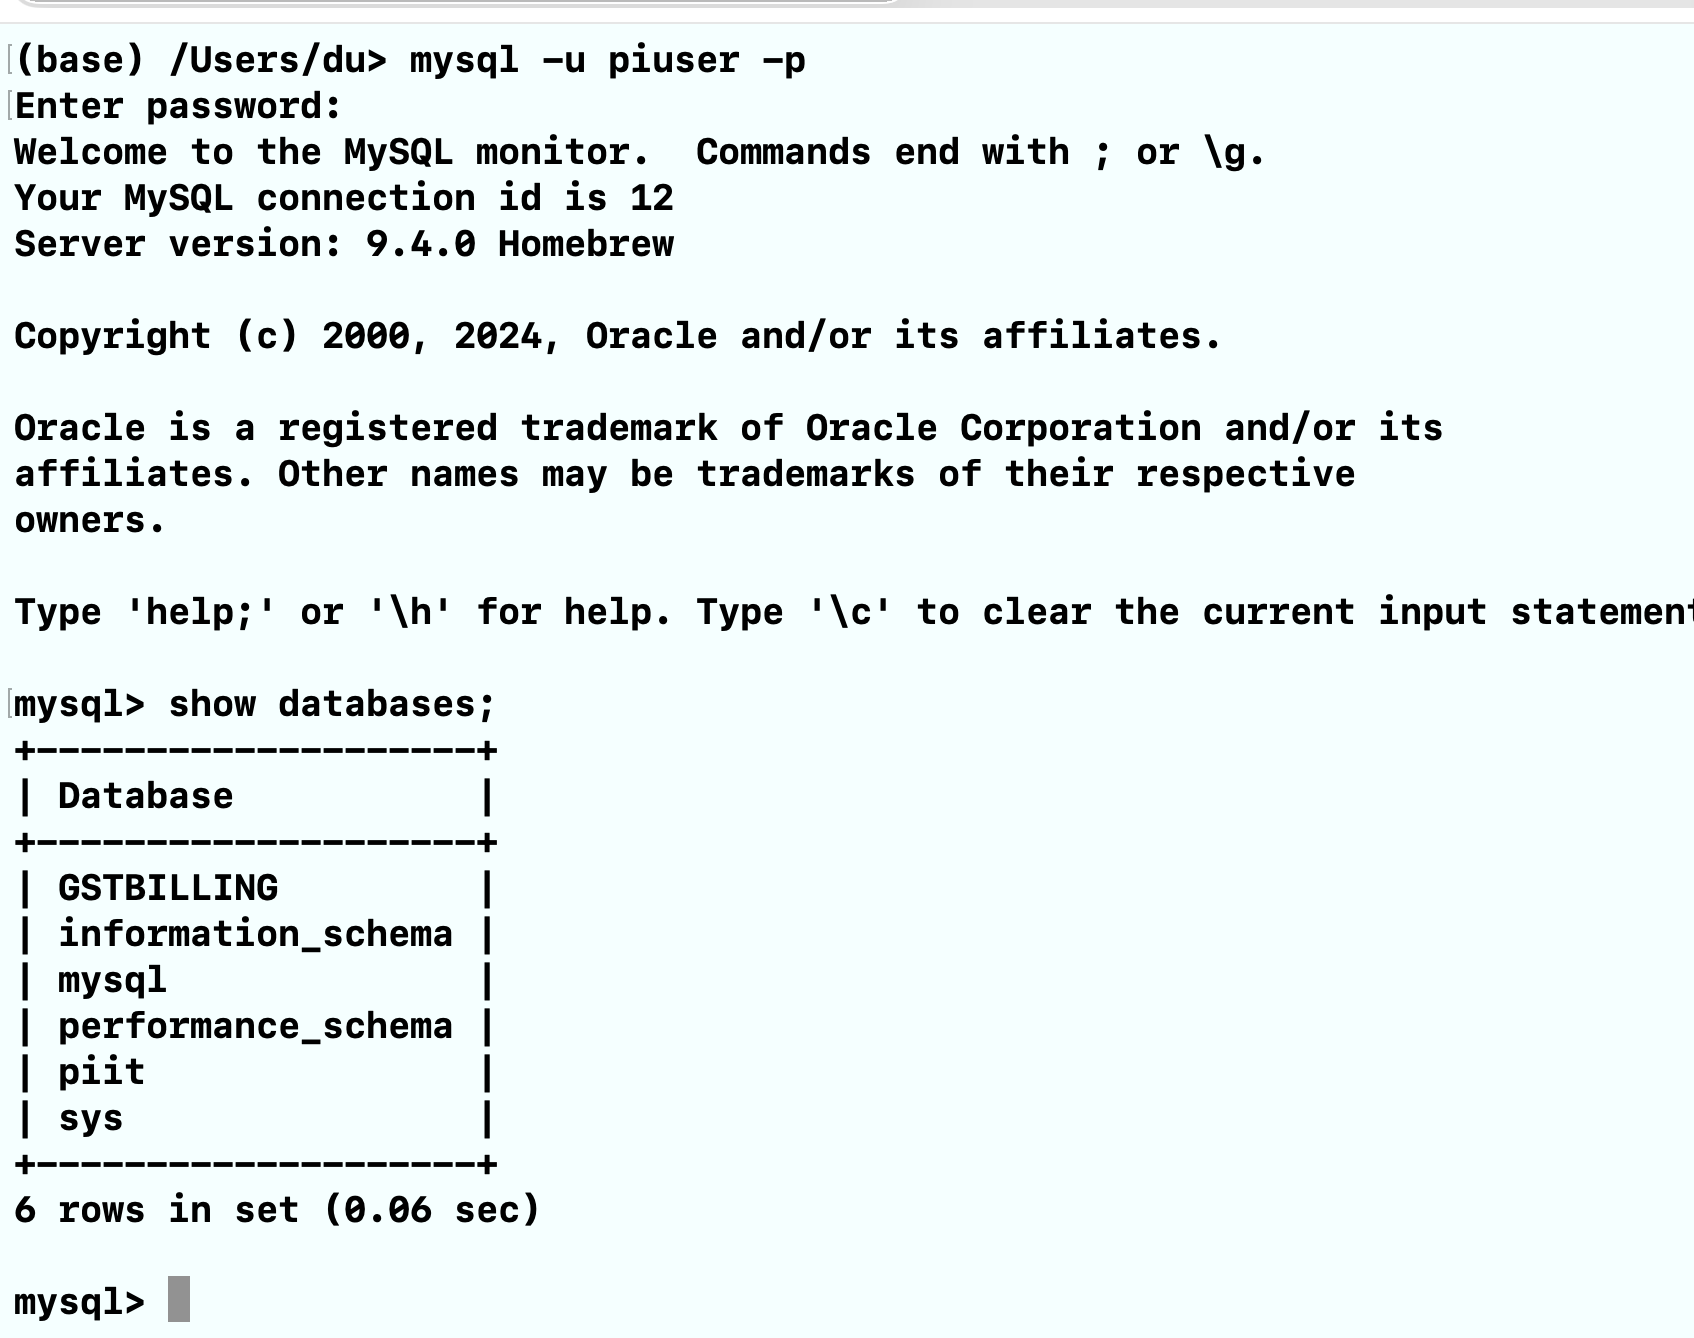

- The GROUP BY clause in MySQL is used to arrange identical data within a table into groups. This clause is typically used in conjunction with aggregate functions to perform calculations on each group and summarize the data. 
- Key aspects of GROUP BY:
    - Grouping Rows: It groups rows that have the same values in one or more specified columns into a single summary row for each unique combination of values.
    - Aggregate Functions: GROUP BY is commonly used with aggregate functions such as COUNT(), SUM(), AVG(), MAX(), and MIN(). These functions operate on the rows within each group, providing a summarized result for that group. 
    - Placement in SQL Queries: In a SELECT statement, the GROUP BY clause is placed after the WHERE clause (if present) and before the ORDER BY clause (if present).
- syntax
    - SELECT column1, aggregate_function(column2)
        - FROM table_name
        - WHERE condition
        - GROUP BY column1, column3, ...
        - ORDER BY column1, ...;
- Examples
    -  Counting occurrences: To count the number of customers in each country: Code
        -  SELECT country, COUNT(customer_id) AS total_customers FROM customers GROUP BY country;
    -  Calculating sums: To find the total sales amount for each product category: Code
        - SELECT product_category, SUM(sales_amount) AS total_sales FROM sales_data GROUP BY product_category;
    -  Using with HAVING: The HAVING clause is used to filter groups based on a condition, similar to how WHERE filters individual rows. For example, to find product categories with total sales greater than a certain amount:
        - SELECT product_category, SUM(sales_amount) AS total_sales FROM sales_data GROUP BY product_category HAVING total_sales > 10000; 

# Create Sales1 Table with data
### Drop table if already exists (optional)
- DROP TABLE IF EXISTS sales1;
### Create the sales table
- CREATE TABLE sales1 (    sale_id INT AUTO_INCREMENT PRIMARY KEY,     sale_date DATE NOT NULL,    region VARCHAR(50),    salesperson VARCHAR(50),    product VARCHAR(50),    quantity INT,    amount DECIMAL(10,2));
### Insert sample data for GROUP BY practice
- INSERT INTO sales1 (sale_date, region, salesperson, product, quantity, amount) VALUES
('2025-01-01', 'North',  'Alice',   'Laptop',   2, 2400.00),
('2025-01-01', 'North',  'Alice',   'Mouse',    5, 125.00),
('2025-01-02', 'South',  'Bob',     'Laptop',   1, 1200.00),
('2025-01-02', 'South',  'Bob',     'Keyboard', 3, 450.00),
('2025-01-03', 'East',   'Charlie', 'Laptop',   1, 1200.00),
('2025-01-03', 'East',   'Charlie', 'Monitor',  2, 600.00),
('2025-01-04', 'West',   'Diana',   'Keyboard', 4, 600.00),
('2025-01-04', 'West',   'Diana',   'Mouse',    10, 250.00),
('2025-01-05', 'North',  'Alice',   'Monitor',  1, 300.00),
('2025-01-05', 'South',  'Bob',     'Mouse',    7, 175.00),
('2025-01-06', 'East',   'Charlie', 'Keyboard', 2, 300.00),
('2025-01-06', 'West',   'Diana',   'Laptop',   1, 1200.00),
('2025-01-07', 'North',  'Alice',   'Laptop',   1, 1200.00),
('2025-01-07', 'South',  'Bob',     'Monitor',  1, 300.00);
### See the first 3 rows of data
- SELECT * from sales1 limit 3;

# Group By  Commands

## Basic Group By
- SELECT region, SUM(amount) AS total_sales FROM sales1 GROUP BY region;

## GROUP BY with multiple columns
- SELECT region, salesperson, SUM(amount) AS total_sales FROM sales1 GROUP BY region, salesperson;

## GROUP BY WITH ROLLUP
- SELECT region, SUM(amount) AS total_sales FROM sales1 GROUP BY region WITH ROLLUP;
- The NULL value in the year column identifies the grand total super-aggregate line.

## Finding totals by product
- SELECT product, SUM(quantity) AS units_sold FROM sales1 GROUP BY product;

# Practise Case - Example 2
- Drop table if it already exists (optional)
    - DROP TABLE IF EXISTS sales2;
- Create the sales table
    - CREATE TABLE sales2(  year    INT,    country VARCHAR(20),    product VARCHAR(32),    profit  INT);
- Insert sample data (practice data for GROUP BY examples)
    - INSERT INTO sales2 (year, country, product, profit) VALUES
(2023, 'USA',       'Laptop',     5000),
(2023, 'USA',       'Tablet',     3000),
(2023, 'USA',       'Phone',      4500),
(2023, 'India',     'Laptop',     4000),
(2023, 'India',     'Tablet',     2500),
(2023, 'India',     'Phone',      5000),
(2023, 'UK',        'Laptop',     3500),
(2023, 'UK',        'Tablet',     2000),
(2023, 'UK',        'Phone',      4200),
(2024, 'USA',       'Laptop',     5200),
(2024, 'USA',       'Tablet',     3100),
(2024, 'USA',       'Phone',      4800),
(2024, 'India',     'Laptop',     4300),
(2024, 'India',     'Tablet',     2700),
(2024, 'India',     'Phone',      5300),
(2024, 'UK',        'Laptop',     3600),
(2024, 'UK',        'Tablet',     2200),
(2024, 'UK',        'Phone',      4500);
- Check the data
    - SELECT * from sales2

## Group by EG2
- SELECT year, SUM(profit) AS profit  FROM sales2 GROUP BY year;

## Group by with Rollup
- The output shows the total (aggregate) profit for each year. To also determine the total profit summed over all years, you must add up the individual values yourself or run an additional query. Or you can use ROLLUP, which provides both levels of analysis with a single query. Adding a WITH ROLLUP modifier to the GROUP BY clause causes the query to produce another (super-aggregate) row that shows the grand total over all year values:
- SELECT year, SUM(profit) AS profit FROM sales2 GROUP BY year WITH ROLLUP;
    - The NULL value in the year column identifies the grand total super-aggregate line.
- SELECT year, SUM(profit) AS profit   FROM sales2 GROUP BY ROLLUP (year);
    - Alternative Syntax
- ROLLUP has a more complex effect when there are multiple GROUP BY columns. In this case, each time there is a change in value in any but the last grouping column, the query produces an extra super-aggregate summary row.
- SELECT year, country, product, SUM(profit) AS profit  FROM sales2 GROUP BY year, country, product;
- SELECT year, country, product, SUM(profit) AS profit  FROM sales2 GROUP BY year, country, product WITH ROLLUP;
### Advanced Rollup
- SELECT year, country, product, SUM(profit) AS profit, GROUPING(year) AS grp_year, GROUPING(country) AS grp_country,  GROUPING(product) AS grp_product  FROM sales2  GROUP BY year, country, product WITH ROLLUP;
- Alternative Query
    -  SELECT COALESCE(year, 'ALL YEARS') AS year_group,   COALESCE(country, 'ALL COUNTRIES') AS country_group,   COALESCE(product, 'ALL PRODUCTS') AS product_group,    SUM(profit) AS profit FROM sales2 GROUP BY year, country, product WITH ROLLUP;

# Other Commands
- Total profit by product, ordered from highest to lowest
    - SELECT product, SUM(profit) AS total_profit FROM sales2 GROUP BY product ORDER BY total_profit DESC;
- Total profit by year and country, ordered by year then profit
    - SELECT year, country, SUM(profit) AS total_profit FROM sales2 GROUP BY year, country ORDER BY year, total_profit DESC;
- Filter groups using HAVING — countries with profit > 12,000
    - SELECT country, SUM(profit) AS total_profit FROM sales2 GROUP BY country HAVING SUM(profit) > 12000;
- Products with total profit between 10,000 and 15,000
    - SELECT product, SUM(profit) AS total_profit FROM sales2 GROUP BY product HAVING SUM(profit) BETWEEN 10000 AND 15000 ORDER BY total_profit;
- Total profit by year, only showing years where total profit > 40,000
    - SELECT year, SUM(profit) AS total_profit FROM sales2 GROUP BY year HAVING SUM(profit) > 40000 ORDER BY total_profit DESC;
-  Multiple grouping + HAVING + ; Find country–product combinations where profit exceeds 5,000, sorted by profit.
    - SELECT country, product, SUM(profit) AS total_profit FROM sales2 GROUP BY country, product HAVING SUM(profit) > 5000 ORDER BY total_profit DESC;

## Practise Questions :GROUP BY + HAVING + ORDER BY – Practice Questions
### A. Basic GROUP BY
-	1.	Write a query to find the total profit made by each country.
-	2.	Show the total profit made for each product.
-	3.	Display the total profit by year.
-	4.	List the total profit by country and year.
-	5.	Find how much profit each country made for each product.

------

### B. GROUP BY + ORDER BY
-	6.	Show the total profit by country, ordered from highest to lowest profit.
-	7.	Show the total profit by product, ordered alphabetically by product name.
-	8.	Display total profit grouped by year, ordered by year descending.
-	9.	For each country–product pair, show total profit, ordered by country then profit.
-	10.	Show country-wise total profit and order by profit ascending.

⸻

#### C. GROUP BY + HAVING
-	11.	Show only those countries whose total profit is greater than 12,000.
-	12.	Find products whose total profit exceeds 10,000.
-	13.	List years where the total profit is less than 40,000.
-	14.	Show country–product combinations where profit > 5,000.
-	15.	Display countries whose average profit per entry is more than 3,000.

⸻

### D. Combined: GROUP BY + HAVING + ORDER BY
-	16.	Show the total profit for each country, but display only those with profit > 15,000, ordered by profit descending.
-	17.	Show total profit for each product for each year, but include only products earning more than 4,000 per year.
-	18.	Display all country–year combinations where total profit is between 10,000 and 20,000, ordered alphabetically by country.
-	19.	Show the products where total profit is greater than both the USA and UK totals for the same product.
-	20.	Identify countries whose total profit is more than the average total profit of all countries.

⸻

###⭐ Bonus: Higher-Order Thinking Questions : Analytical reasoning:
-	21.	Which country shows the most consistent profit across products?
-	22.	Which product has the highest combined multi-year profit?
-	23.	Which year was most profitable overall?
-	24.	If you were a manager, which product would you recommend scaling up based on grouped profit trends?
-	25.	Identify one insight and one anomaly from the grouped profit data.

## Views
DROP TABLE IF EXISTS customers;
DROP TABLE IF EXISTS products;
DROP TABLE IF EXISTS orders;
DROP TABLE IF EXISTS order_items;

-- Customers table
CREATE TABLE customers (
    customer_id INT AUTO_INCREMENT PRIMARY KEY,
    customer_name VARCHAR(50),
    country VARCHAR(30)
);

-- Products table
CREATE TABLE products (
    product_id INT AUTO_INCREMENT PRIMARY KEY,
    product_name VARCHAR(50),
    category VARCHAR(30),
    price DECIMAL(10,2)
);

-- Orders table
CREATE TABLE orders (
    order_id INT AUTO_INCREMENT PRIMARY KEY,
    customer_id INT,
    order_date DATE,
    FOREIGN KEY (customer_id) REFERENCES customers(customer_id)
);

-- Order items table
CREATE TABLE order_items (
    order_item_id INT AUTO_INCREMENT PRIMARY KEY,
    order_id INT,
    product_id INT,
    quantity INT,
    amount DECIMAL(10,2),
    FOREIGN KEY (order_id) REFERENCES orders(order_id),
    FOREIGN KEY (product_id) REFERENCES products(product_id)
);

-- Customers
INSERT INTO customers (customer_name, country) VALUES
('Alice', 'USA'),
('Bob', 'India'),
('Charlie', 'UK'),
('Diana', 'USA');

-- Products
INSERT INTO products (product_name, category, price) VALUES
('Laptop', 'Electronics', 1200.00),
('Tablet', 'Electronics', 600.00),
('Phone', 'Electronics', 800.00),
('Mouse', 'Accessories', 25.00);

-- Orders
INSERT INTO orders (customer_id, order_date) VALUES
(1, '2025-01-02'),
(2, '2025-01-03'),
(3, '2025-01-04'),
(1, '2025-01-05');

-- Order Items
INSERT INTO order_items (order_id, product_id, quantity, amount) VALUES
(1, 1, 1, 1200.00),  -- Alice Laptop
(1, 4, 2, 50.00),    -- Alice Mouse
(2, 3, 1, 800.00),   -- Bob Phone
(3, 2, 1, 600.00),   -- Charlie Tablet
(4, 1, 1, 1200.00);  -- Alice Laptop again

CREATE VIEW customer_view AS
SELECT customer_id, customer_name, country
FROM customers;

In [ ]:
CREATE VIEW order_details_view AS
SELECT 
    o.order_id,
    o.order_date,
    c.customer_name,
    oi.product_id,
    p.product_name,
    oi.quantity,
    oi.amount
FROM orders o
JOIN customers c ON o.customer_id = c.customer_id
JOIN order_items oi ON o.order_id = oi.order_id
JOIN products p ON oi.product_id = p.product_id;

CREATE VIEW product_sales_view AS
SELECT 
    p.product_name,
    SUM(oi.quantity) AS total_units_sold,
    SUM(oi.amount) AS total_sales
FROM products p
JOIN order_items oi ON p.product_id = oi.product_id
GROUP BY p.product_name;

CREATE VIEW customer_public_view AS
SELECT customer_name, country
FROM customers;

CREATE VIEW customer_sales_summary AS
SELECT 
    c.customer_name,
    SUM(oi.amount) AS total_spent,
    COUNT(o.order_id) AS total_orders
FROM customers c
LEFT JOIN orders o ON c.customer_id = o.customer_id
LEFT JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY c.customer_name;